In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import mysql.connector

### **Read Multiple Datas in pandas**

#### **Forest**

In [5]:
file_path ="Bird_Monitoring_Data_FOREST.xlsx"

In [6]:
excel_data = pd.ExcelFile(file_path)

In [7]:
sheet_names = excel_data.sheet_names

In [8]:
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [9]:
df1 = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [10]:
df1 = df1.drop(columns=['Sheet'])

In [11]:
df1.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [12]:
df1.describe()

,Year,Date,Visit,AcceptedTSN,NPSTaxonCode,Temperature,Humidity
count,8546.0,8546,8546.000000,8537.000000,8546.000000,8546.000000,8546.000000
mean,2018.0,2018-06-12 21:17:23.856775168,1.487245,246572.359025,137088.791013,21.871507,77.757032
min,2018.0,2018-05-07 00:00:00,1.000000,174717.000000,76625.000000,11.000000,17.500000
25%,2018.0,2018-05-29 00:00:00,1.000000,178359.000000,85846.000000,19.400000,72.500000
50%,2018.0,2018-06-12 00:00:00,1.000000,179021.000000,88350.000000,21.900000,78.800003
75%,2018.0,2018-07-01 00:00:00,2.000000,179759.000000,94215.000000,24.299999,84.300003
max,2018.0,2018-07-15 00:00:00,2.000000,950106.000000,926917.000000,34.400002,97.900002
std,0.0,NaN,0.499867,181764.826428,154932.276585,3.652511,9.296123


### **Grassland**

In [13]:
file_path_1 = "Bird_Monitoring_Data_GRASSLAND.xlsx"

In [14]:
excel_data_1 = pd.ExcelFile(file_path_1)

In [15]:
sheet_names_1 = excel_data_1.sheet_names

In [16]:
sheets_dict_1 = {sheet: excel_data_1.parse(sheet) for sheet in sheet_names_1}

In [17]:
df2 = pd.concat(
    [
        df.assign(Sheet=sheet_name)
        for sheet_name, df in sheets_dict_1.items()
        if not df.dropna(how='all').empty 
    ],
    ignore_index=True
)


In [18]:
df2 = df2.drop(columns=['Sheet'])

In [19]:
df2.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [20]:
df2.describe()

,Sub_Unit_Code,Year,Date,Visit,AcceptedTSN,NPSTaxonCode,Temperature,Humidity
count,0.0,8531.0,8531,8531.000000,8507.000000,8529.000000,8531.000000,8531.000000
mean,NaN,2018.0,2018-06-14 02:08:37.360215808,1.939280,198849.811567,103234.178567,23.270519,69.620045
min,NaN,2018.0,2018-05-07 00:00:00,1.000000,174773.000000,76625.000000,11.000000,7.300000
25%,NaN,2018.0,2018-05-23 00:00:00,1.000000,178620.000000,85643.000000,20.200001,62.700001
50%,NaN,2018.0,2018-06-18 00:00:00,2.000000,179150.000000,88038.000000,22.900000,70.400002
75%,NaN,2018.0,2018-07-11 00:00:00,3.000000,179443.000000,94206.000000,26.299999,79.400002
max,NaN,2018.0,2018-07-19 00:00:00,3.000000,950061.000000,926917.000000,37.299999,98.800003
std,NaN,0.0,NaN,0.829027,95977.967632,83967.631378,4.695856,13.585098


In [21]:
df = pd.concat([df1, df2], ignore_index=True)

In [22]:
df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN


In [23]:
df.dtypes

Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                          float64
AOU_Code                               object
PIF_Watchlist_Status              

In [24]:
df.isnull().sum()

Admin_Unit_Code                    0
Sub_Unit_Code                  16355
Site_Name                       8531
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                        1486
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       33
NPSTaxonCode                       2
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
D

In [25]:
df.drop(['Admin_Unit_Code','Sub_Unit_Code','Site_Name','Sex','Previously_Obs','AcceptedTSN','NPSTaxonCode'], axis=1, inplace=True)

In [26]:
df['Start_Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Start_Time'].astype(str), format='%Y-%m-%d %I:%M:%S')

In [27]:
df['End_Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['End_Time'].astype(str), format='%Y-%m-%d %I:%M:%S')

In [28]:
df['Duration'] = (df['End_Datetime'] - df['Start_Datetime']).dt.total_seconds()

In [29]:
df['Month'] = df['Date'].dt.strftime('%B')

In [30]:
df['ID_Method'] = df['ID_Method'].fillna(df['ID_Method'].mode()[0])

In [31]:
mode_val = df['Distance'].mode()[0]
df['Distance'] = df['Distance'].fillna(mode_val)

In [32]:
def month_to_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'
        
df['Season'] = df['Month'].apply(month_to_season)


In [33]:
df['Start_Hour'] = df['Start_Datetime'].dt.hour

In [34]:
def time_period(hour):
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Start_Hour'].apply(time_period)

In [35]:
df.isnull().sum()

Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Start_Datetime                 0
End_Datetime                   0
Duration                       0
Month                          0
Season                         0
Start_Hour                     0
Time_Period                    0
dtype: int

In [36]:
df.drop(['Start_Time','End_Time','End_Datetime','Date'], axis=1, inplace=True)

## **CONNECT SQL DATABASE**

In [37]:
conn=mysql.connector.connect(host="localhost",user="root",password="Dhinesh@0512")

In [38]:
cursor=conn.cursor()

In [39]:
cursor.execute("CREATE DATABASE BIRDS_DATABASE")

In [40]:
cursor.execute("USE BIRDS_DATABASE")

In [41]:
cursor.execute("""
    CREATE TABLE BIRDS_ANALYSIS (
    `Plot_Name` VARCHAR(100),
    `Location_Type` VARCHAR(100),
    `Year` INT,
    `Observer` VARCHAR(100),
    `Visit` INT,
    `Interval_Length` VARCHAR(100),
    `ID_Method` VARCHAR(100),
    `Distance` VARCHAR(100),
    `Flyover_Observed` VARCHAR(100),
    `Common_Name` VARCHAR(100),
    `Scientific_Name` VARCHAR(100),
    `AOU_Code` VARCHAR(100),
    `PIF_Watchlist_Status` VARCHAR(100),
    `Regional_Stewardship_Status` VARCHAR(100),
    `Temperature` FLOAT,
    `Humidity` FLOAT,
    `Sky` VARCHAR(100),
    `Wind` VARCHAR(100),
    `Disturbance` VARCHAR(100),
    `Initial_Three_Min_Cnt` VARCHAR(100),
    `Start_Datetime` DATETIME,
    `Duration` INT,
    `Month` VARCHAR(100),
    `Season` VARCHAR(100),
    `Start_Hour` INT,
    `Time_Period` VARCHAR(100)
);
""")

In [42]:
q1 = """
INSERT INTO BIRDS_ANALYSIS(
    Plot_Name, Location_Type, Year, Observer, Visit, Interval_Length, ID_Method,
    Distance, Flyover_Observed, Common_Name, Scientific_Name, AOU_Code,
    PIF_Watchlist_Status, Regional_Stewardship_Status, Temperature, Humidity,
    Sky, Wind, Disturbance, Initial_Three_Min_Cnt, Start_Datetime, Duration,
    Month, Season, Start_Hour, Time_Period
) VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
)
"""
values1 = df.values.tolist()
cursor.executemany(q1, values1)
conn.commit()

OUTLIER DETECTION

In [43]:
# List of columns to check for outliers
columns_to_check = ['Temperature', 'Humidity']

# DataFrame to collect all outliers
outliers = pd.DataFrame()

# Loop through each column and find outliers using IQR
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Boolean mask for outliers
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_in_col = df[mask]
    
    print(f"{col} → {len(outliers_in_col)} outliers found")

    # Collect outliers
    outliers = pd.concat([outliers, outliers_in_col])

Temperature → 254 outliers found
Humidity → 390 outliers found


OUTLIERS IN TEMPERATURE

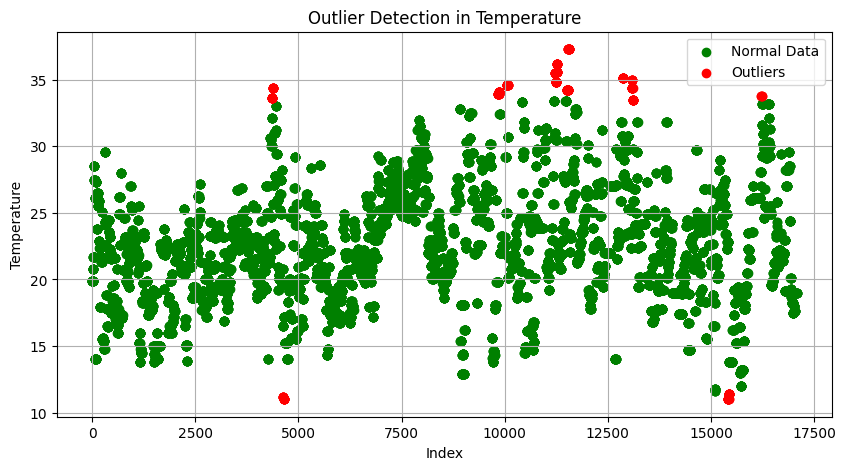

In [44]:
import matplotlib.pyplot as plt

# IQR outlier detection
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Masks
Outliers = (df['Temperature'] < lower) | (df['Temperature'] > upper)
Normal_data = ~Outliers  # everything else
# Plot
plt.figure(figsize=(10, 5))
plt.scatter(df.index[Normal_data], df['Temperature'][Normal_data], color='green', label='Normal Data')
plt.scatter(df.index[Outliers], df['Temperature'][Outliers], color='red', label='Outliers')
plt.title('Outlier Detection in Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

OUTLIERS IN HUMIDITY

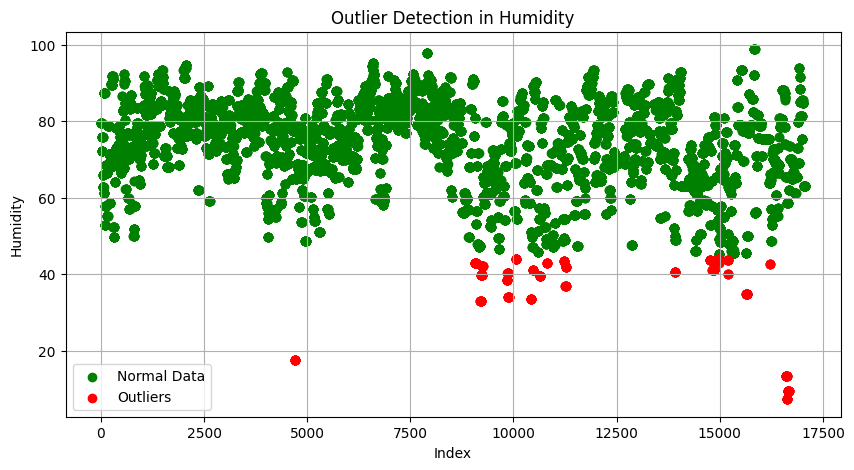

In [45]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Masks
Outliers = (df['Humidity'] < lower) | (df['Humidity'] > upper)
Normal_data = ~Outliers  # everything else

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(df.index[Normal_data], df['Humidity'][Normal_data], color='green', label='Normal Data')
plt.scatter(df.index[Outliers], df['Humidity'][Outliers], color='red', label='Outliers')
plt.title('Outlier Detection in Humidity')
plt.xlabel('Index')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
df.head()

,Plot_Name,Location_Type,Year,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Common_Name,...,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Start_Datetime,Duration,Month,Season,Start_Hour,Time_Period
0,ANTI-0036,Forest,2018,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Eastern Towhee,...,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,600.0,May,Spring,6,Early Morning
1,ANTI-0036,Forest,2018,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,White-breasted Nuthatch,...,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,600.0,May,Spring,6,Early Morning
2,ANTI-0036,Forest,2018,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Red-bellied Woodpecker,...,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,600.0,May,Spring,6,Early Morning
3,ANTI-0036,Forest,2018,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Orchard Oriole,...,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,600.0,May,Spring,6,Early Morning
4,ANTI-0036,Forest,2018,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Northern Mockingbird,...,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,600.0,May,Spring,6,Early Morning


In [47]:
obj_cols = df.select_dtypes(include=['object']).columns

In [48]:
df_encoded = df.copy()

In [49]:
for col in obj_cols:
    freq_map = df[col].value_counts().to_dict()
    df_encoded[col] = df[col].map(freq_map)

In [50]:
bool_cols = df_encoded.select_dtypes(include=['bool']).columns

In [51]:
for col in bool_cols:
    df_encoded[col] = df_encoded[col].astype(int)

In [52]:
df_encoded.head()

,Plot_Name,Location_Type,Year,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Common_Name,...,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Start_Datetime,Duration,Month,Season,Start_Hour,Time_Period
0,34,8546,2018,6391,1,8614,9865,7352,0,263,...,3097,4417,8029,1,2018-05-22 06:19:00,600.0,5596,5596,6,10167
1,34,8546,2018,6391,1,8614,4061,7352,0,214,...,3097,4417,8029,1,2018-05-22 06:19:00,600.0,5596,5596,6,10167
2,34,8546,2018,6391,1,3410,4061,9725,0,493,...,3097,4417,8029,0,2018-05-22 06:19:00,600.0,5596,5596,6,10167
3,34,8546,2018,6391,1,3410,9865,7352,0,18,...,3097,4417,8029,0,2018-05-22 06:19:00,600.0,5596,5596,6,10167
4,34,8546,2018,6391,1,3410,3151,7352,0,143,...,3097,4417,8029,0,2018-05-22 06:19:00,600.0,5596,5596,6,10167


In [53]:
df_encoded.isnull().sum()

Plot_Name                      0
Location_Type                  0
Year                           0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Start_Datetime                 0
Duration                       0
Month                          0
Season                         0
Start_Hour                     0
Time_Period                    0
dtype: int64

In [54]:
df.isnull().sum()

Plot_Name                      0
Location_Type                  0
Year                           0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Start_Datetime                 0
Duration                       0
Month                          0
Season                         0
Start_Hour                     0
Time_Period                    0
dtype: int64

In [55]:
df_encoded.to_csv("Preprocessed_Data.csv", index=False)


# **EDA**

## **TEMPORAL ANALYSIS**

##### **SEASONAL TREND**

In [56]:
month_counts = df.groupby(['Location_Type', 'Month']).size().unstack(fill_value=0)
print("📅 Observations per Month by Habitat:\n")
print(month_counts)

📅 Observations per Month by Habitat:

Month          July  June   May
Location_Type                  
Forest         2143  4013  2390
Grassland      2742  2583  3206


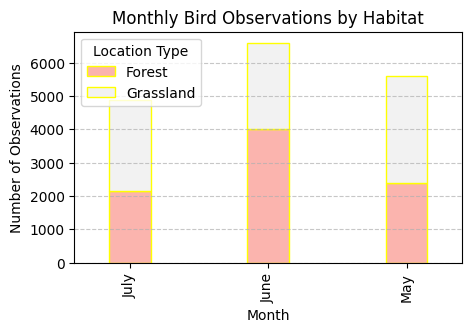

In [57]:
# Transpose so months are on x-axis
month_counts = month_counts.T

# Plot
month_counts.plot( 
    kind='bar',
    stacked=True,
    figsize=(5, 3),
    colormap='Pastel1',
    edgecolor='yellow',
    width= 0.3
)

plt.title("Monthly Bird Observations by Habitat")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.legend(title="Location Type", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [58]:
year_counts = df.groupby(['Location_Type', 'Year']).size().unstack(fill_value=0)
print("📆 Observations per Year by Habitat:\n")
print(year_counts)

📆 Observations per Year by Habitat:

Year           2018
Location_Type      
Forest         8546
Grassland      8531


In [59]:
all_seasons = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_counts = df.groupby(['Location_Type', 'Season']).size().unstack().fillna(0).reindex(columns=all_seasons, fill_value=0)
print("Seasonal Bird Observation Counts by Location Type:\n")
print(seasonal_counts)

Seasonal Bird Observation Counts by Location Type:

Season         Winter  Spring  Summer  Fall
Location_Type                              
Forest              0    2390    6156     0
Grassland           0    3206    5325     0


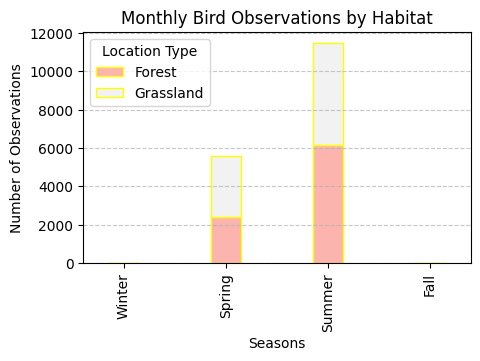

In [60]:
seasonal_counts = seasonal_counts.T

# Plot
seasonal_counts.plot( 
    kind='bar',
    stacked=True,
    figsize=(5, 3),
    colormap='Pastel1',
    edgecolor='yellow',
    width= 0.3
)

plt.title("Monthly Bird Observations by Habitat")
plt.xlabel("Seasons")
plt.ylabel("Number of Observations")
plt.legend(title="Location Type", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### **OBSERVATION TIME**

In [61]:
# Summary statistics
summary = {
    'Start_Hour_mean': df['Start_Hour'].mean(),
    'Start_Hour_median': df['Start_Hour'].median(),
    'Start_Hour_mode': df['Start_Hour'].mode()[0],
    'Earliest_Start_Time': df['Start_Datetime'].min(),
    'Latest_Start_Time': df['Start_Datetime'].max(),
    'Duration_mean_min': df['Duration'].mean(),
    'Duration_min_min': df['Duration'].min(),
    'Duration_max_min': df['Duration'].max()
}
print("Summary Statistics")
for k, v in summary.items():
    print(f"{k}: {v}")

Summary Statistics
Start_Hour_mean: 7.2728230953914625
Start_Hour_median: 7.0
Start_Hour_mode: 7
Earliest_Start_Time: 2018-05-07 05:56:00
Latest_Start_Time: 2018-07-19 07:31:00
Duration_mean_min: 606.0326755284887
Duration_min_min: 600.0
Duration_max_min: 4200.0


In [62]:
obs_by_hour = (df['Start_Hour'].value_counts().reset_index(name='Observation_Count').sort_values(by='Start_Hour', ascending=True).reset_index(drop=True))
print("Observation by Hour:\n",obs_by_hour)

Observation by Hour:
    Start_Hour  Observation_Count
0           5               1363
1           6               4171
2           7               4633
3           8               3477
4           9               2220
5          10               1213


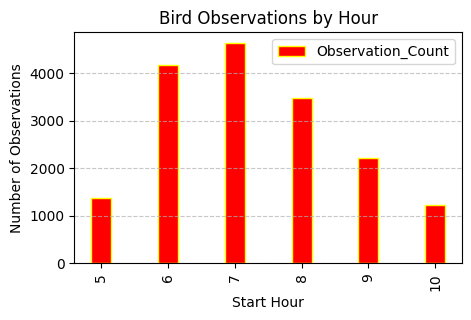

In [63]:
obs_by_hour.set_index('Start_Hour', inplace=True)
obs_by_hour.plot(
      kind='bar',
    stacked=False,
    figsize=(5, 3),
    color='red',
    edgecolor='yellow',
    width= 0.3
)
plt.title("Bird Observations by Hour")
plt.xlabel("Start Hour")
plt.ylabel("Number of Observations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [64]:
obs_by_period = df['Time_Period'].value_counts().reset_index(name='Observation Count').reset_index(drop=True)
print("Observation by Period:\n",obs_by_period)

Observation by Period:
      Time_Period  Observation Count
0  Early Morning              10167
1        Morning               6910


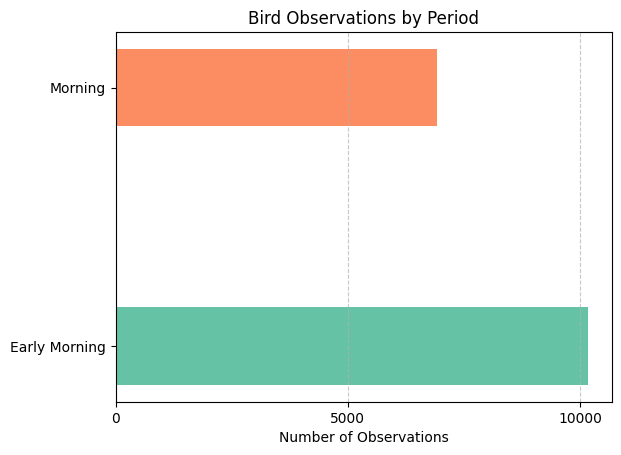

In [65]:
labels = obs_by_period['Time_Period']
sizes = obs_by_period['Observation Count']
plt.barh(labels, sizes, color=['#66c2a5', '#fc8d62'],height=0.3)
plt.xlabel("Number of Observations")
plt.title("Bird Observations by Period")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(range(0, 11000, 5000))
plt.show()

In [66]:
duration_by_hour = df.groupby('Start_Hour')['Duration'].mean().reset_index(name='Average_Duration')
print("Average Duration by Hour:\n",duration_by_hour)

Average Duration by Hour:
    Start_Hour  Average_Duration
0           5        609.684519
1           6        613.363702
2           7        601.230304
3           8        604.814495
4           9        602.135135
5          10        605.688376


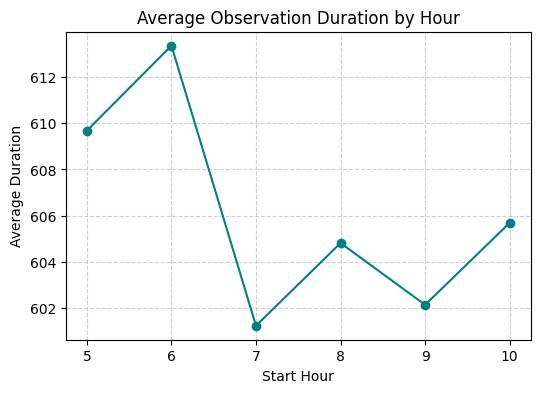

In [67]:
plt.figure(figsize=(6, 4))
plt.plot(duration_by_hour['Start_Hour'], duration_by_hour['Average_Duration'],marker='o', linestyle='-', color='teal')
plt.title("Average Observation Duration by Hour")
plt.xlabel("Start Hour")
plt.ylabel("Average Duration")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [68]:
duration_by_period = df.groupby('Time_Period')['Duration'].mean().reset_index(name='Average_Duration')
print("Average Duration by Time Period:\n",duration_by_period)

Average Duration by Time Period:
      Time_Period  Average_Duration
0  Early Morning        607.341399
1        Morning        604.107091


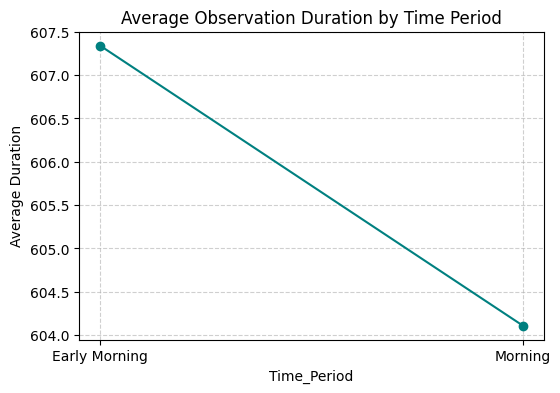

In [69]:
plt.figure(figsize=(6, 4))
plt.plot(duration_by_period['Time_Period'], duration_by_period['Average_Duration'],marker='o', linestyle='-', color='teal')
plt.title("Average Observation Duration by Time Period")
plt.xlabel("Time_Period")
plt.ylabel("Average Duration")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

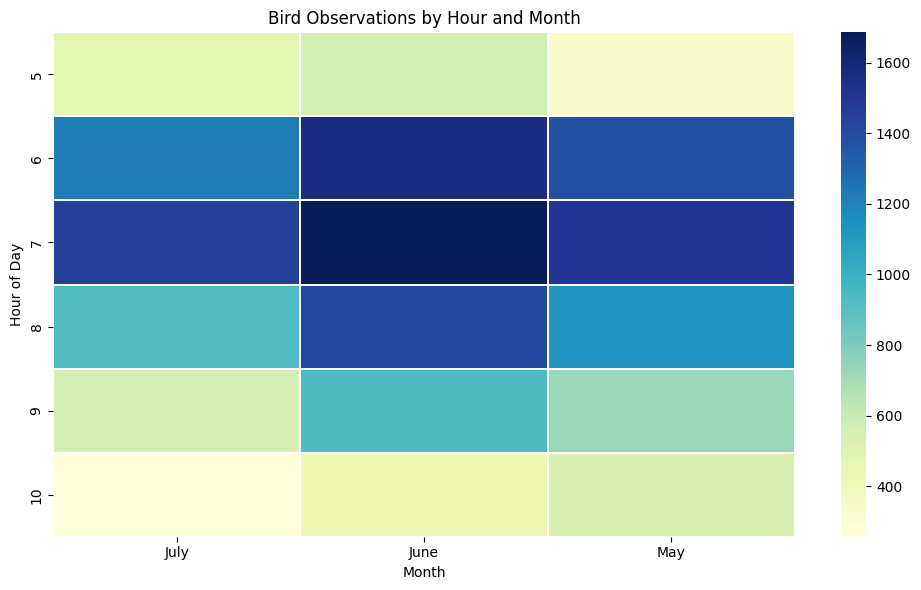

In [70]:
# Create pivot table
heatmap_data = df.pivot_table(index='Start_Hour', columns='Month', values='Scientific_Name', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, linewidths=0.3)
plt.title("Bird Observations by Hour and Month")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


## **SPATIAL ANALYSIS**

##### **LOCATION INSIGHTS**

In [71]:
obs_per_location = df.groupby('Location_Type').size().sort_values().reset_index(name='Observation_Count')
print("Observation counts by Location_Type:\n",obs_per_location)

Observation counts by Location_Type:
   Location_Type  Observation_Count
0     Grassland               8531
1        Forest               8546


In [72]:
if 'Common_Name' in df.columns:
    species_count_by_location = df.groupby('Location_Type')['Common_Name'].nunique().sort_values().reset_index(name='Unique_Species_Count')
    print("Unique species count by Location_Type:\n",species_count_by_location)

Unique species count by Location_Type:
   Location_Type  Unique_Species_Count
0     Grassland                   107
1        Forest                   108


##### **PLOT-LEVEL ANALYSIS**

In [73]:
obs_per_plot = df['Plot_Name'].value_counts().reset_index(name='Observation_Count')
print("▶ Total bird observations per plot:\n", obs_per_plot.head())

▶ Total bird observations per plot:
    Plot_Name  Observation_Count
0  MONO-0054                204
1  MONO-0094                118
2  MANA-0076                116
3  MONO-0102                 88
4  MONO-0050                 77


In [74]:
species_per_plot = df.groupby('Plot_Name')['Scientific_Name'].nunique().sort_values(ascending=False)
print("▶ Number of unique species per plot:\n", species_per_plot.head())

▶ Number of unique species per plot:
 Plot_Name
ANTI-0105    27
MANA-0047    27
MONO-0057    27
MONO-0066    26
CHOH-0812    26
Name: Scientific_Name, dtype: int64


In [75]:
most_common_species = df.groupby('Plot_Name')['Scientific_Name'].agg(lambda x: x.value_counts().index[0])
print("▶ Most frequently observed species per plot:\n", most_common_species.head())

▶ Most frequently observed species per plot:
 Plot_Name
ANTI-0007    Cardinalis cardinalis
ANTI-0008      Agelaius phoeniceus
ANTI-0009         Passerina cyanea
ANTI-0015      Bombycilla cedrorum
ANTI-0016       Quiscalus quiscula
Name: Scientific_Name, dtype: object


In [76]:
top_biodiverse_plots = species_per_plot.head(5).reset_index(name='Species_Count')
print("▶ Plots with highest species richness:\n", top_biodiverse_plots)

▶ Plots with highest species richness:
    Plot_Name  Species_Count
0  ANTI-0105             27
1  MANA-0047             27
2  MONO-0057             27
3  MONO-0066             26
4  CHOH-0812             26


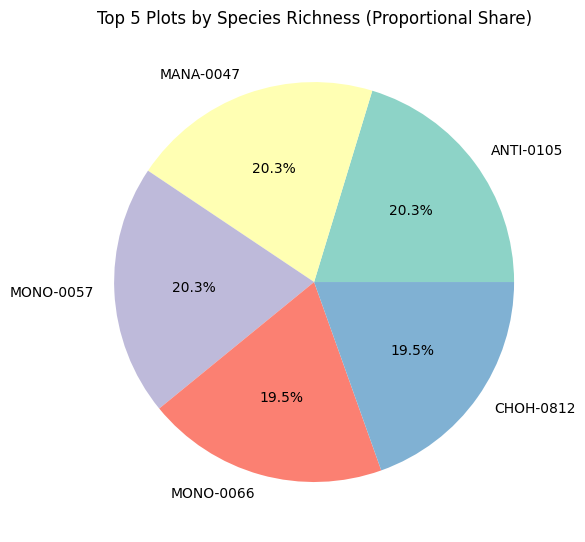

In [77]:
plt.figure(figsize=(6, 6))
plt.pie(
    top_biodiverse_plots['Species_Count'],
    labels=top_biodiverse_plots['Plot_Name'],
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors
)
plt.title("Top 5 Plots by Species Richness (Proportional Share)")
plt.tight_layout()
plt.show()

In [78]:
species_counts = df.groupby('Scientific_Name')['Plot_Name'].nunique()
unique_species = species_counts[species_counts == 1].index
unique_species_df = df[df['Scientific_Name'].isin(unique_species)]
print("▶ Number of plot-exclusive species:", len(unique_species))
print("Sample of species only seen in one plot:\n", unique_species_df[['Plot_Name', 'Scientific_Name']].drop_duplicates().head())

▶ Number of plot-exclusive species: 13
Sample of species only seen in one plot:
       Plot_Name          Scientific_Name
1349  CHOH-0002      Butorides virescens
3309  CHOH-0433     Vermivora cyanoptera
4040  HAFE-0044         Falco peregrinus
5571  NACE-0296  Oreothlypis ruficapilla
5614  NACE-0269    Oreothlypis peregrina


In [79]:
summary = df.groupby('Plot_Name').agg(
    total_observations=('Scientific_Name', 'count'),
    unique_species=('Scientific_Name', 'nunique'),
    mean_duration=('Duration', 'mean')
).sort_values(by='unique_species', ascending=False)
print("▶ Summary per plot (top rows):\n", summary.head())

▶ Summary per plot (top rows):
            total_observations  unique_species  mean_duration
Plot_Name                                                   
ANTI-0105                  55              27          600.0
MANA-0047                  47              27          600.0
MONO-0057                  54              27          600.0
MONO-0066                  51              26          600.0
CHOH-0812                  42              26          600.0


## **SPECIES ANALYSIS**

##### **DIVERSITY METRICS**

In [80]:
total_unique_species = df['Scientific_Name'].nunique()
print(f"▶ Total unique species observed: {total_unique_species}")

▶ Total unique species observed: 127


In [81]:
species_per_location = df.groupby('Location_Type')['Scientific_Name'].nunique().reset_index(name='Count')
print("▶ Number of unique species per Location_Type:\n", species_per_location)

▶ Number of unique species per Location_Type:
   Location_Type  Count
0        Forest    108
1     Grassland    107


In [82]:
obs_per_location = df['Location_Type'].value_counts().rename("Observations")
species_per_location = df.groupby('Location_Type')['Scientific_Name'].nunique().rename("Unique_Species")
richness_df = pd.concat([species_per_location, obs_per_location], axis=1)
richness_df['Species_Richness_Ratio'] = (richness_df['Unique_Species'] / richness_df['Observations']) * 100
print("▶ Species Richness per 100 observations (by Location_Type):\n")
print(richness_df.sort_values(by='Species_Richness_Ratio', ascending=False))

▶ Species Richness per 100 observations (by Location_Type):

               Unique_Species  Observations  Species_Richness_Ratio
Location_Type                                                      
Forest                    108          8546                1.263749
Grassland                 107          8531                1.254249


In [83]:
most_common_species_by_location = df.groupby('Location_Type')['Scientific_Name'] \
    .agg(lambda x: x.value_counts().idxmax()).reset_index(name='Scientific_Name')
print("▶ Most frequent species per Location_Type:\n", most_common_species_by_location)

▶ Most frequent species per Location_Type:
   Location_Type        Scientific_Name
0        Forest        Vireo olivaceus
1     Grassland  Cardinalis cardinalis


In [84]:
species_location_counts = df.groupby('Scientific_Name')['Location_Type'].nunique()
exclusive_species = species_location_counts[species_location_counts == 1].index
exclusive_df = df[df['Scientific_Name'].isin(exclusive_species)]
exclusive_species_by_location = exclusive_df.groupby('Location_Type')['Scientific_Name'].nunique().reset_index(name='Count')
print("▶ Number of location-exclusive species per Location_Type:\n", exclusive_species_by_location)

▶ Number of location-exclusive species per Location_Type:
   Location_Type  Count
0        Forest     20
1     Grassland     19


##### **ACTIVITY PATTERNS**

In [85]:
activity_counts = df['ID_Method'].value_counts().reset_index(name="Count")
activity_counts

,ID_Method,Count
0,Singing,9865
1,Calling,4061
2,Visualization,3151


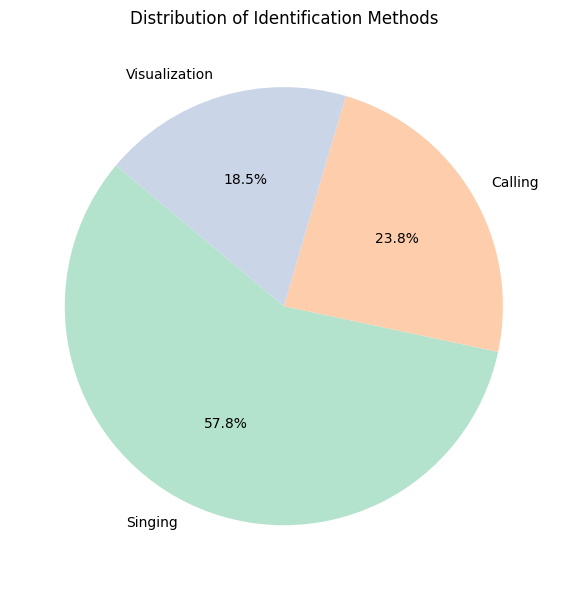

In [86]:
plt.figure(figsize=(6, 6))
plt.pie(
    activity_counts['Count'],
    labels=activity_counts['ID_Method'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)
plt.title("Distribution of Identification Methods")
plt.tight_layout()
plt.show()

In [87]:
activity_by_interval = df.groupby('Interval_Length')['ID_Method'].value_counts().unstack().fillna(0).reset_index()
activity_by_interval

ID_Method,Interval_Length,Calling,Singing,Visualization
0,0-2.5 min,1795,5689,1130
1,2.5 - 5 min,981,1828,601
2,5 - 7.5 min,694,1263,763
3,7.5 - 10 min,591,1085,657


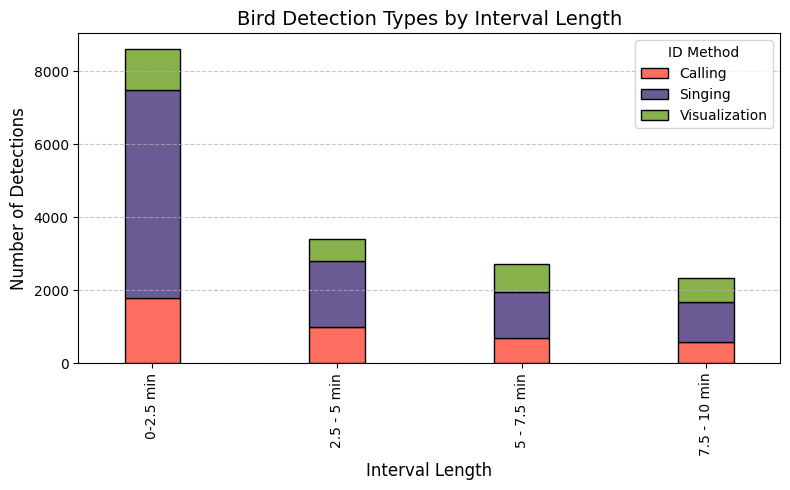

In [88]:
activity_by_interval.set_index('Interval_Length', inplace=True)

# Plot
activity_by_interval.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color = ['#ff6f61', '#6b5b95', '#88b04b'],
    edgecolor='black',
    width=0.3
)

# Customize chart
plt.title("Bird Detection Types by Interval Length", fontsize=14)
plt.xlabel("Interval Length", fontsize=12)
plt.ylabel("Number of Detections", fontsize=12)
plt.legend(title="ID Method", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show chart
plt.show()

In [89]:
most_common_by_interval = df.groupby('Interval_Length')['ID_Method'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_by_interval

,Interval_Length,ID_Method
0,0-2.5 min,Singing
1,2.5 - 5 min,Singing
2,5 - 7.5 min,Singing
3,7.5 - 10 min,Singing


In [90]:
activity_summary = df.groupby(['ID_Method', 'Interval_Length']).size().reset_index(name='Count')
activity_summary

,ID_Method,Interval_Length,Count
0,Calling,0-2.5 min,1795
1,Calling,2.5 - 5 min,981
2,Calling,5 - 7.5 min,694
3,Calling,7.5 - 10 min,591
4,Singing,0-2.5 min,5689
5,Singing,2.5 - 5 min,1828
6,Singing,5 - 7.5 min,1263
7,Singing,7.5 - 10 min,1085
8,Visualization,0-2.5 min,1130
9,Visualization,2.5 - 5 min,601


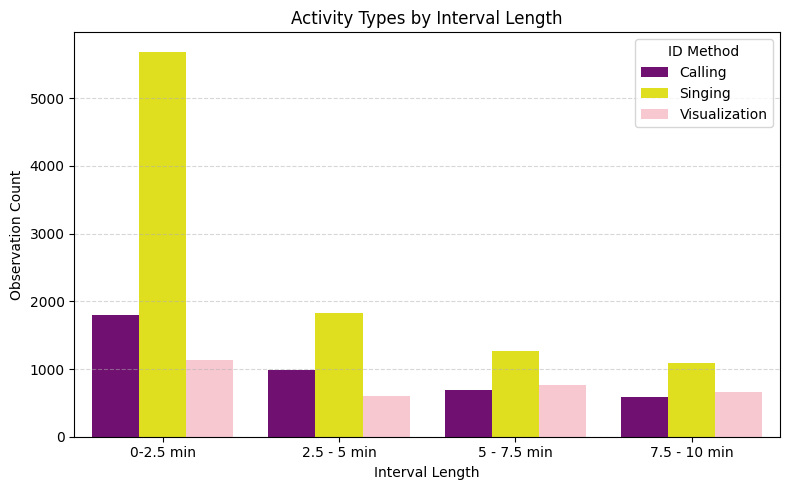

In [91]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=activity_summary, 
    x='Interval_Length', 
    y='Count', 
    hue='ID_Method', 
    palette=['purple', 'yellow', 'pink']
)
plt.title('Activity Types by Interval Length')
plt.xlabel('Interval Length')
plt.ylabel('Observation Count')
plt.legend(title='ID Method')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## **ENVIRONMENTAL CONDITIONS**

##### **WEATHER CORRELATION**

In [92]:
weather_obs = df.groupby(['Temperature', 'Humidity', 'Sky', 'Wind','Distance']).size().reset_index(name='Observation_Count')
print(weather_obs.head())

   Temperature   Humidity                  Sky  \
0         11.0  90.800003  Clear or Few Clouds   
1         11.0  90.800003  Clear or Few Clouds   
2         11.0  90.800003  Clear or Few Clouds   
3         11.0  90.800003  Clear or Few Clouds   
4         11.2  81.500000                  Fog   

                                        Wind         Distance  \
0      Calm (< 1 mph) smoke rises vertically  50 - 100 Meters   
1      Calm (< 1 mph) smoke rises vertically     <= 50 Meters   
2  Light air movement (1-3 mph) smoke drifts  50 - 100 Meters   
3  Light air movement (1-3 mph) smoke drifts     <= 50 Meters   
4  Light air movement (1-3 mph) smoke drifts  50 - 100 Meters   

   Observation_Count  
0                  2  
1                  7  
2                 11  
3                  1  
4                  2  


In [93]:
temp_obs=df.groupby(['Temperature','Distance']).size().reset_index(name='Count')
print("▶ Bird Observation Counts by Wind Condition:\n",temp_obs)

▶ Bird Observation Counts by Wind Condition:
      Temperature         Distance  Count
0      11.000000  50 - 100 Meters     13
1      11.000000     <= 50 Meters      8
2      11.200000  50 - 100 Meters      2
3      11.200000     <= 50 Meters      4
4      11.400000  50 - 100 Meters      9
..           ...              ...    ...
412    35.599998     <= 50 Meters      3
413    36.200001  50 - 100 Meters      4
414    36.200001     <= 50 Meters      7
415    37.299999  50 - 100 Meters      6
416    37.299999     <= 50 Meters      9

[417 rows x 3 columns]


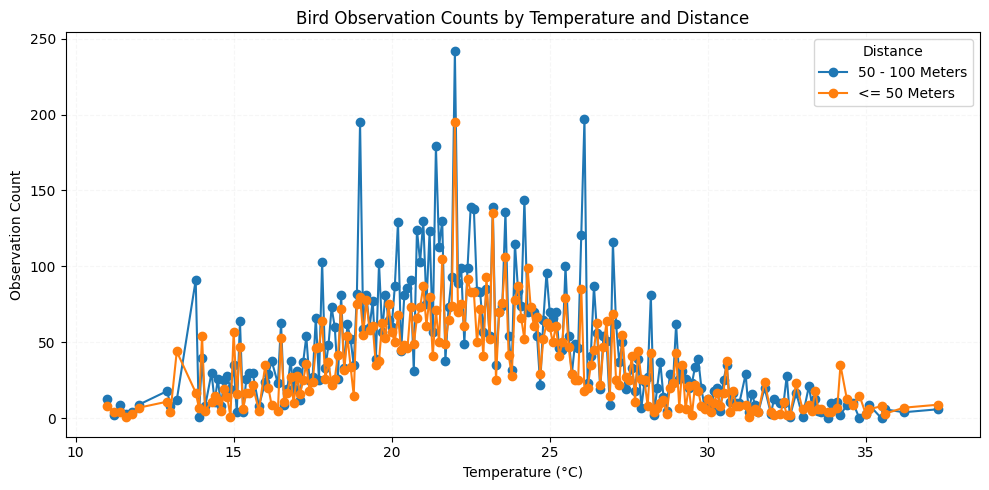

In [94]:
# Pivot the data for plotting
pivot_df = temp_obs.pivot(index='Temperature', columns='Distance', values='Count').fillna(0)

# Plot
plt.figure(figsize=(10, 5))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=col)

plt.title("Bird Observation Counts by Temperature and Distance")
plt.xlabel("Temperature (°C)")
plt.ylabel("Observation Count")
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(title="Distance")
plt.tight_layout()
plt.show()


In [95]:
hum_obs=df.groupby(['Humidity','Distance']).size().reset_index(name='Count')
print("▶ Bird Observation Counts by Humidity:\n",hum_obs)

▶ Bird Observation Counts by Humidity:
       Humidity         Distance  Count
0     7.300000  50 - 100 Meters      9
1     7.300000     <= 50 Meters      2
2     9.500000  50 - 100 Meters     14
3     9.500000     <= 50 Meters      8
4    13.300000  50 - 100 Meters     15
..         ...              ...    ...
843  95.099998     <= 50 Meters      1
844  97.900002  50 - 100 Meters      2
845  97.900002     <= 50 Meters     11
846  98.800003  50 - 100 Meters     11
847  98.800003     <= 50 Meters      1

[848 rows x 3 columns]


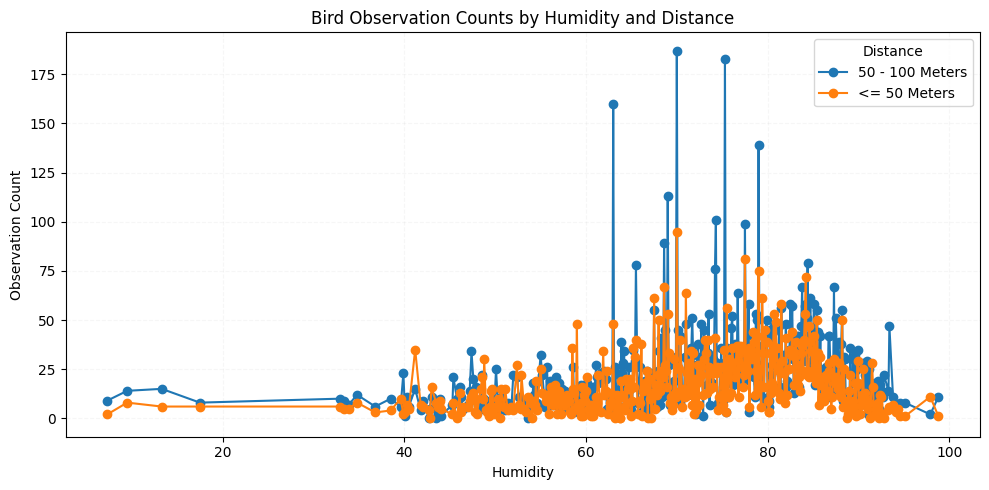

In [96]:
# Pivot the data for plotting
pivot_df = hum_obs.pivot(index='Humidity', columns='Distance', values='Count').fillna(0)
# Plot
plt.figure(figsize=(10, 5))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=col)

plt.title("Bird Observation Counts by Humidity and Distance")
plt.xlabel("Humidity")
plt.ylabel("Observation Count")
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(title="Distance")
plt.tight_layout()
plt.show()


In [97]:
sky_obs=df.groupby(['Sky','Distance']).size().reset_index(name='Count')
print("▶ Bird Observation Counts by Sky Condition:\n",sky_obs)

▶ Bird Observation Counts by Sky Condition:
                    Sky         Distance  Count
0  Clear or Few Clouds  50 - 100 Meters   3166
1  Clear or Few Clouds     <= 50 Meters   2643
2      Cloudy/Overcast  50 - 100 Meters   1764
3      Cloudy/Overcast     <= 50 Meters   1333
4                  Fog  50 - 100 Meters    347
5                  Fog     <= 50 Meters    300
6         Mist/Drizzle  50 - 100 Meters    191
7         Mist/Drizzle     <= 50 Meters    188
8        Partly Cloudy  50 - 100 Meters   4257
9        Partly Cloudy     <= 50 Meters   2888


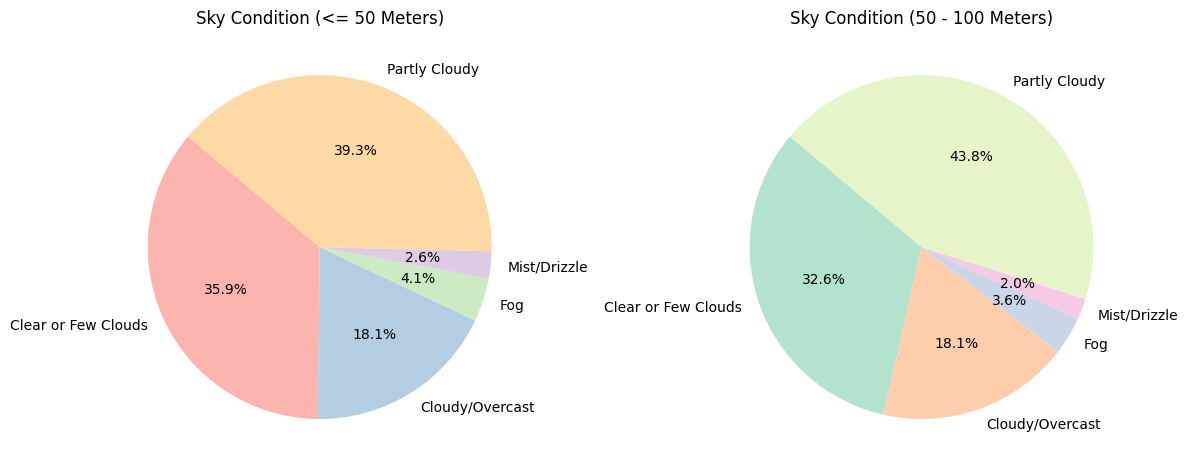

In [98]:
sky_50 = sky_obs[sky_obs['Distance'] == '<= 50 Meters']
sky_100 = sky_obs[sky_obs['Distance'] == '50 - 100 Meters']

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for <= 50 Meters
axs[0].pie(
    sky_50['Count'],
    labels=sky_50['Sky'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
axs[0].set_title('Sky Condition (<= 50 Meters)')

# Pie chart for 50 - 100 Meters
axs[1].pie(
    sky_100['Count'],
    labels=sky_100['Sky'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)
axs[1].set_title('Sky Condition (50 - 100 Meters)')

plt.tight_layout()
plt.show()


In [99]:
wind_obs=df.groupby(['Wind','Distance']).size().reset_index(name='Count')
print("▶ Bird Observation Counts by Wind Condition:\n",wind_obs)

▶ Bird Observation Counts by Wind Condition:
                                          Wind         Distance  Count
0       Calm (< 1 mph) smoke rises vertically  50 - 100 Meters   2324
1       Calm (< 1 mph) smoke rises vertically     <= 50 Meters   2093
2  Gentle breeze (8-12 mph), leaves in motion  50 - 100 Meters    244
3  Gentle breeze (8-12 mph), leaves in motion     <= 50 Meters    168
4   Light air movement (1-3 mph) smoke drifts  50 - 100 Meters   4820
5   Light air movement (1-3 mph) smoke drifts     <= 50 Meters   3691
6    Light breeze (4-7 mph) wind felt on face  50 - 100 Meters   2337
7    Light breeze (4-7 mph) wind felt on face     <= 50 Meters   1400


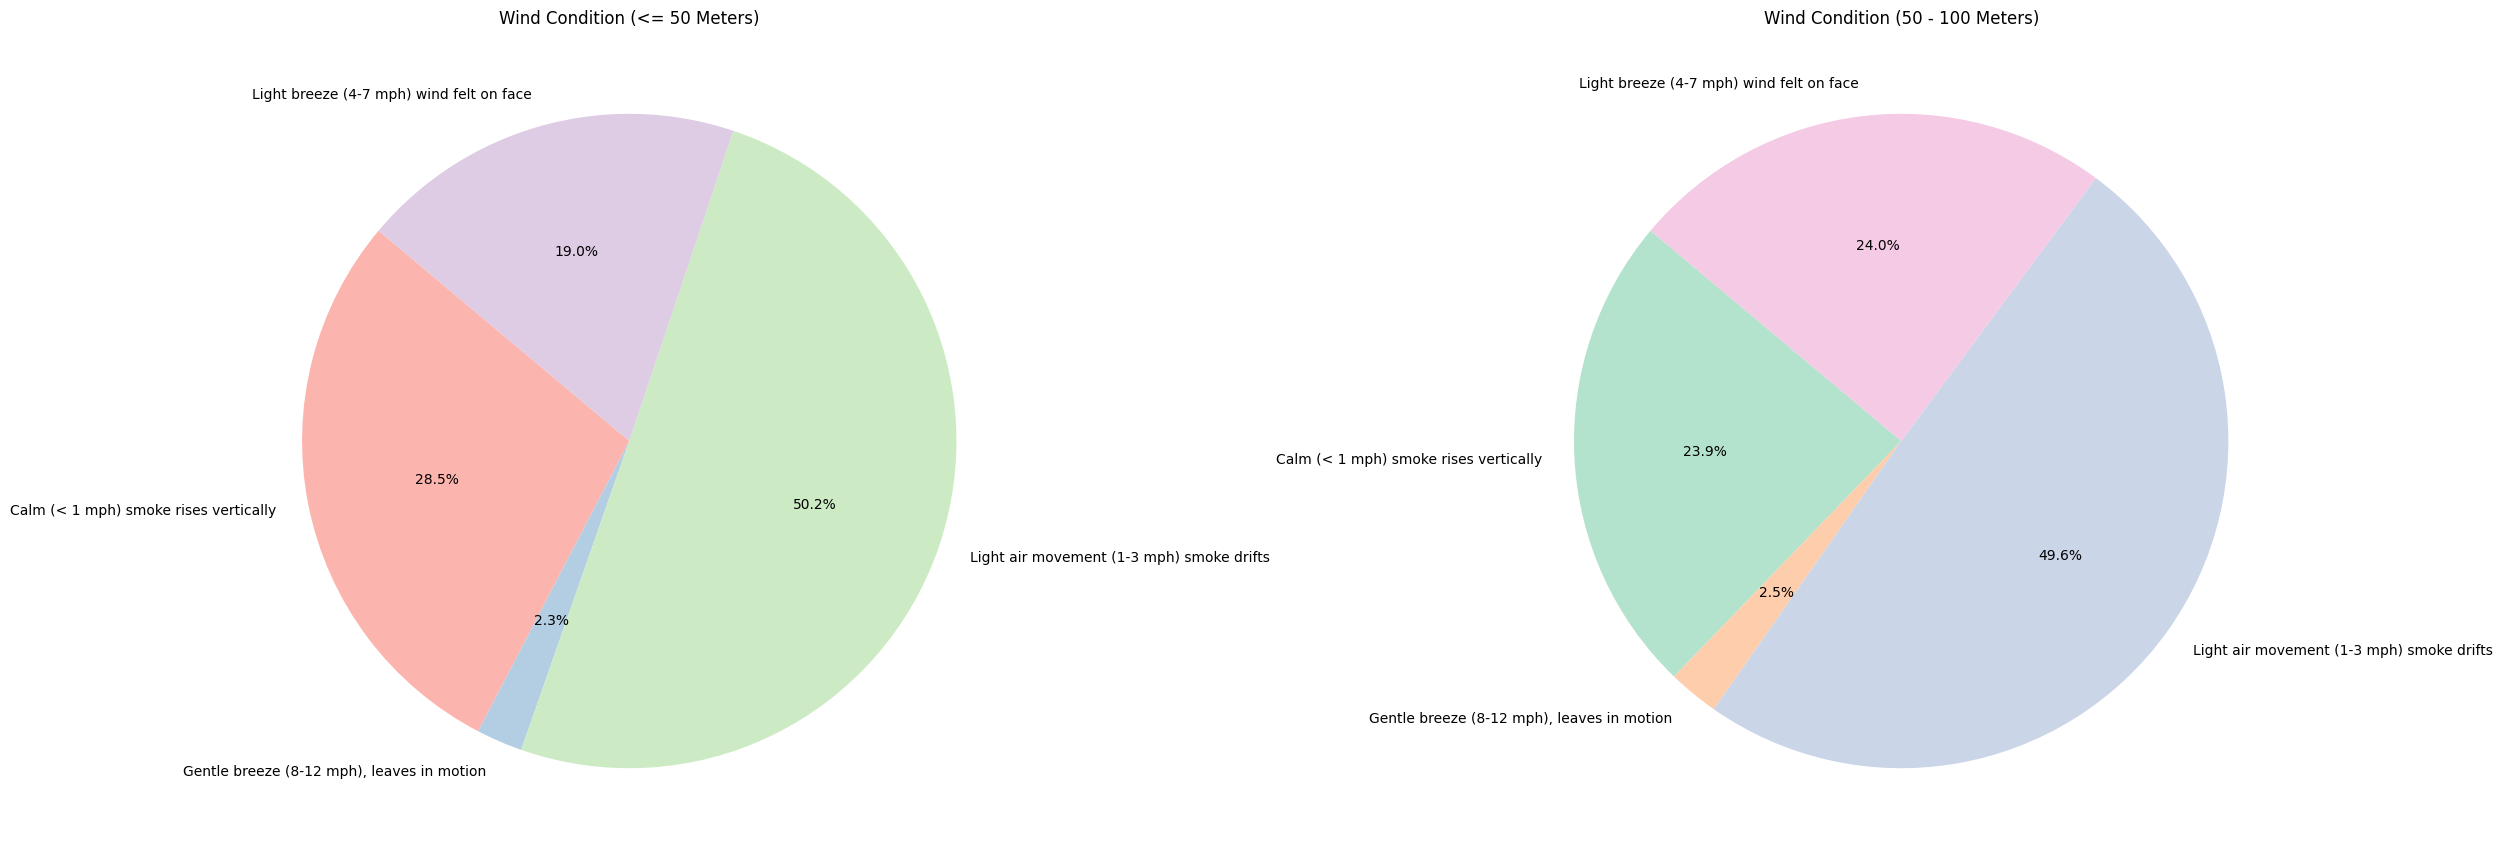

In [100]:
wind_50 = wind_obs[wind_obs['Distance'] == '<= 50 Meters']
wind_100 = wind_obs[wind_obs['Distance'] == '50 - 100 Meters']

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 25))

# Pie chart for <= 50 Meters
axs[0].pie(
    wind_50['Count'],
    labels=wind_50['Wind'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
axs[0].set_title('Wind Condition (<= 50 Meters)')

# Pie chart for 50 - 100 Meters
axs[1].pie(
    wind_100['Count'],
    labels=wind_100['Wind'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)
axs[1].set_title('Wind Condition (50 - 100 Meters)')

plt.tight_layout()
plt.show()

##### **DISTURBANCE EFFECT**

In [101]:
obs_by_disturbance = df['Disturbance'].value_counts().reset_index(name='Observation Count')
print("▶ Bird observations by Disturbance level:\n", obs_by_disturbance)

▶ Bird observations by Disturbance level:
                 Disturbance  Observation Count
0        No effect on count               8029
1    Slight effect on count               6750
2  Moderate effect on count               1819
3   Serious effect on count                479


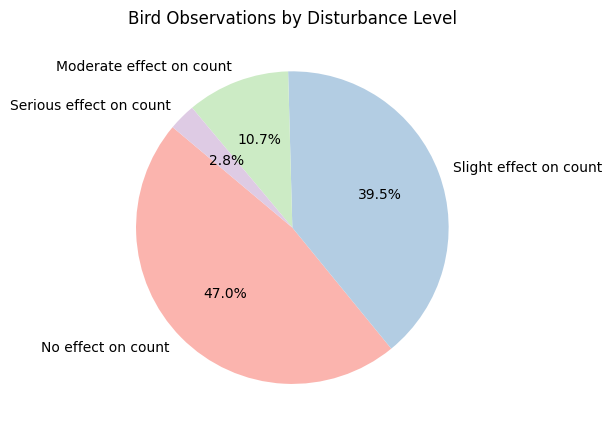

In [102]:
plt.subplots(figsize=(6, 6))
plt.pie(
    obs_by_disturbance['Observation Count'],
    labels=obs_by_disturbance['Disturbance'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Bird Observations by Disturbance Level')
plt.tight_layout()
plt.show()


In [103]:
species_per_disturbance = df.groupby('Disturbance')['Scientific_Name'].nunique().reset_index(name='Unique Species')
print("▶ Unique species observed per Disturbance level:\n", species_per_disturbance)

▶ Unique species observed per Disturbance level:
                 Disturbance  Unique Species
0  Moderate effect on count              90
1        No effect on count             108
2   Serious effect on count              62
3    Slight effect on count             110


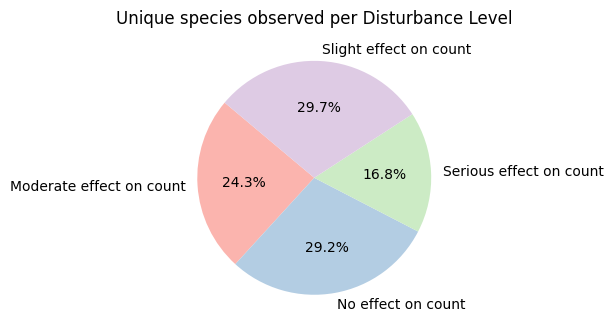

In [104]:
plt.subplots(figsize=(6, 6))
plt.pie(
    species_per_disturbance['Unique Species'],
    labels=species_per_disturbance['Disturbance'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Unique species observed per Disturbance Level')
plt.tight_layout()
plt.show()


In [105]:
duration_by_disturbance = df.groupby('Disturbance')['Duration'].mean().reset_index(name='Average Duration')
print("▶ Average observation duration by Disturbance level:\n", duration_by_disturbance)

▶ Average observation duration by Disturbance level:
                 Disturbance  Average Duration
0  Moderate effect on count        602.078065
1        No effect on count        610.626479
2   Serious effect on count        607.265136
3    Slight effect on count        601.546667


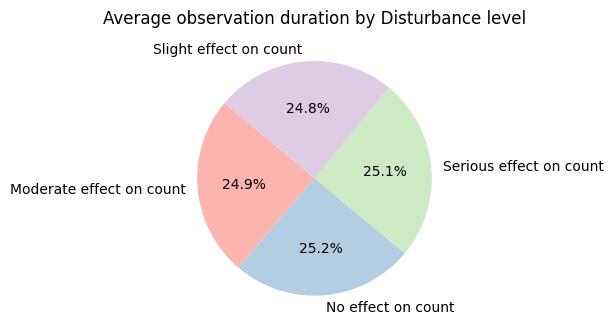

In [106]:
plt.subplots(figsize=(6, 6))
plt.pie(
    duration_by_disturbance['Average Duration'],
    labels=duration_by_disturbance['Disturbance'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Average observation duration by Disturbance level')
plt.tight_layout()
plt.show()


## **DISTANCE AND BEHAVIOR**

##### **DISTANCE ANALYSIS**

In [107]:
unique_distance= df['Distance'].value_counts().reset_index(name='Observation_Count')
print("▶ Unique Distance Categories:\n",unique_distance)

▶ Unique Distance Categories:
           Distance  Observation_Count
0  50 - 100 Meters               9725
1     <= 50 Meters               7352


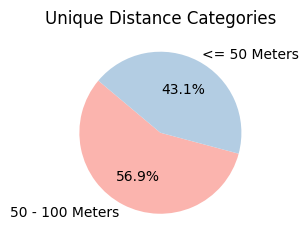

In [108]:
plt.subplots(figsize=(3, 3))
plt.pie(
    unique_distance['Observation_Count'],
    labels=unique_distance['Distance'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Unique Distance Categories')
plt.tight_layout()
plt.show()

In [109]:
close_species = df[df['Distance'] == '<= 50 Meters']['Scientific_Name'].value_counts().head(10).reset_index(name='Observation_Count')
print("▶ Top species frequently observed within 50 meters:\n", close_species)

▶ Top species frequently observed within 50 meters:
             Scientific_Name  Observation_Count
0     Cardinalis cardinalis                569
1  Thryothorus ludovicianus                441
2        Baeolophus bicolor                325
3           Vireo olivaceus                325
4       Polioptila caerulea                307
5       Empidonax virescens                286
6        Turdus migratorius                268
7          Passerina cyanea                266
8     Ammodramus savannarum                240
9      Poecile carolinensis                230


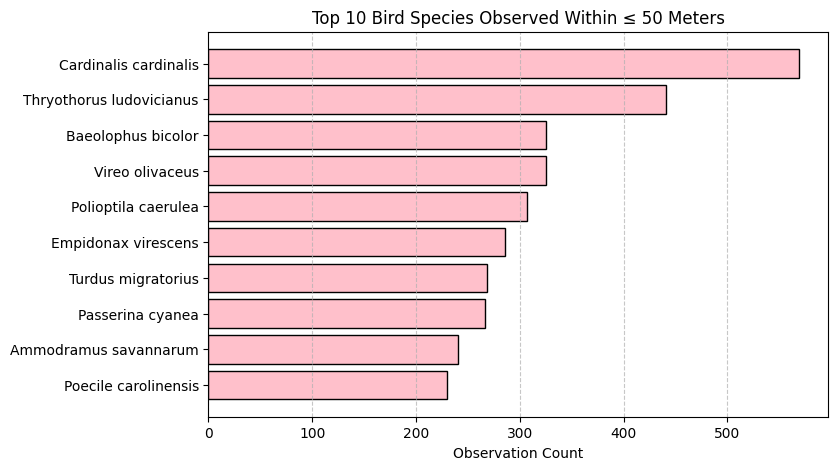

In [110]:
plt.figure(figsize=(8, 5))
plt.barh(close_species['Scientific_Name'], close_species['Observation_Count'], color='pink', edgecolor='black')
plt.xlabel('Observation Count')
plt.title('Top 10 Bird Species Observed Within ≤ 50 Meters')
plt.gca().invert_yaxis()  # So the most frequent is on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [111]:
far_species = df[df['Distance'] == '50 - 100 Meters']['Scientific_Name'].value_counts().head(10).reset_index(name='Observation_Count')
print("▶ Top species frequently observed at 50–100 meters:\n", far_species)

▶ Top species frequently observed at 50–100 meters:
             Scientific_Name  Observation_Count
0     Cardinalis cardinalis                591
1  Thryothorus ludovicianus                570
2          Sturnus vulgaris                458
3           Contopus virens                415
4           Vireo olivaceus                414
5        Baeolophus bicolor                403
6          Passerina cyanea                369
7          Spizella pusilla                344
8       Bombycilla cedrorum                289
9          Zenaida macroura                287


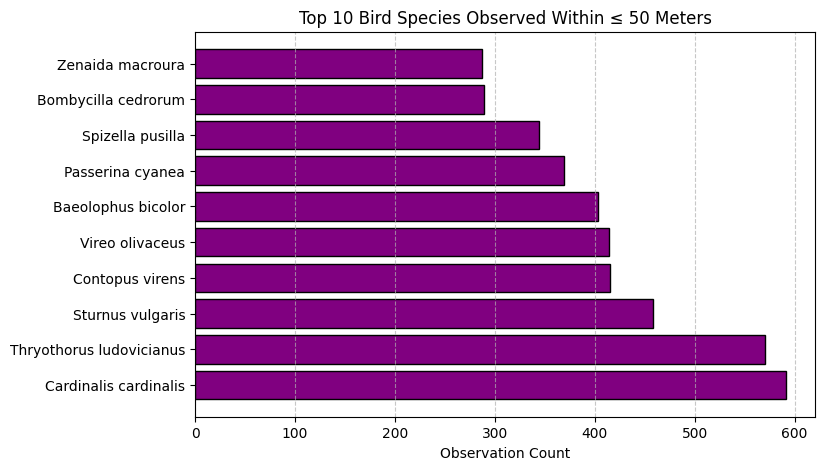

In [112]:
plt.figure(figsize=(8, 5))
plt.barh(far_species['Scientific_Name'], far_species['Observation_Count'], color='purple', edgecolor='black')
plt.xlabel('Observation Count')
plt.title('Top 10 Bird Species Observed Within ≤ 50 Meters')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [113]:
distance_by_species = df.groupby('Scientific_Name')['Distance'].agg(lambda x: x.value_counts().idxmax())
print("▶ Most common distance per species (top 10):\n", distance_by_species)

▶ Most common distance per species (top 10):
 Scientific_Name
Accipiter cooperii        50 - 100 Meters
Agelaius phoeniceus       50 - 100 Meters
Aix sponsa                50 - 100 Meters
Ammodramus savannarum        <= 50 Meters
Anas platyrhynchos           <= 50 Meters
                               ...       
Vireo gilvus                 <= 50 Meters
Vireo griseus                <= 50 Meters
Vireo olivaceus           50 - 100 Meters
Zenaida macroura          50 - 100 Meters
Zonotrichia albicollis    50 - 100 Meters
Name: Distance, Length: 127, dtype: object


In [114]:
distance_summary = df.groupby('Distance')['Scientific_Name'].nunique().reset_index(name='Unique_Species')
print("▶ Unique species observed per distance category:\n", distance_summary)

▶ Unique species observed per distance category:
           Distance  Unique_Species
0  50 - 100 Meters             119
1     <= 50 Meters             110


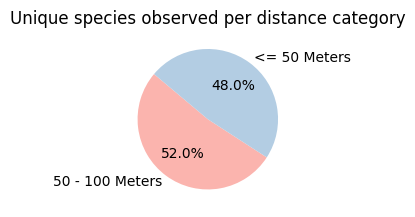

In [115]:
plt.subplots(figsize=(3, 3))
plt.pie(
    distance_summary['Unique_Species'],
    labels=distance_summary['Distance'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Unique species observed per distance category')
plt.tight_layout()
plt.show()

##### **FLYOVER FREQUENCY**

In [116]:
flyover_stats = df['Flyover_Observed'].value_counts().reset_index(name='Count')
print("▶ Flyover Observation Summary:\n")
print(flyover_stats)

▶ Flyover Observation Summary:

   Flyover_Observed  Count
0             False  15591
1              True   1486


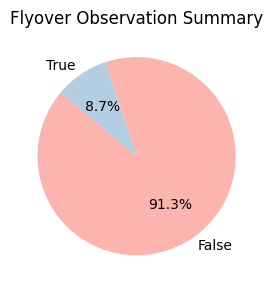

In [117]:
plt.subplots(figsize=(3, 3))
plt.pie(
    flyover_stats['Count'],
    labels=flyover_stats['Flyover_Observed'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Flyover Observation Summary')
plt.tight_layout()
plt.show()

In [118]:
flyover_by_species = df[df['Flyover_Observed'] == True]['Scientific_Name'].value_counts().head(10).reset_index(name='Observation_Count')
print("▶ Top species observed as flyovers:\n", flyover_by_species)

▶ Top species observed as flyovers:
          Scientific_Name  Observation_Count
0       Sturnus vulgaris                323
1    Bombycilla cedrorum                263
2     Quiscalus quiscula                144
3        Hirundo rustica                129
4      Carduelis tristis                101
5    Agelaius phoeniceus                 85
6       Zenaida macroura                 56
7         Cathartes aura                 48
8  Corvus brachyrhynchos                 45
9         Molothrus ater                 34


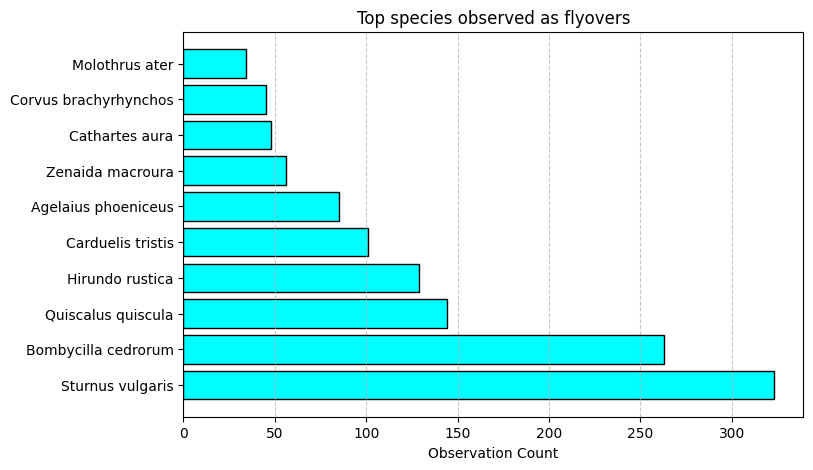

In [119]:
plt.figure(figsize=(8, 5))
plt.barh(flyover_by_species['Scientific_Name'], flyover_by_species['Observation_Count'], color='cyan', edgecolor='black')
plt.xlabel('Observation Count')
plt.title('Top species observed as flyovers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [120]:
flyover_by_location = df[df['Flyover_Observed'] == True]['Location_Type'].value_counts().reset_index(name='Observation_Count')
print("▶ Top locations observed as flyovers:\n", flyover_by_location)

▶ Top locations observed as flyovers:
   Location_Type  Observation_Count
0     Grassland               1394
1        Forest                 92


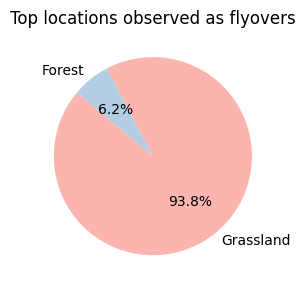

In [121]:
plt.subplots(figsize=(3, 3))
plt.pie(
    flyover_by_location['Observation_Count'],
    labels=flyover_by_location['Location_Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top locations observed as flyovers')
plt.tight_layout()
plt.show()

In [122]:
flyover_by_hour = df[df['Flyover_Observed'] == True]['Start_Hour'].value_counts().sort_index().reset_index(name='Flyover_Count')
print("▶ Flyover counts by hour of the day:\n", flyover_by_hour)

▶ Flyover counts by hour of the day:
    Start_Hour  Flyover_Count
0           5             69
1           6            343
2           7            498
3           8            268
4           9            150
5          10            158


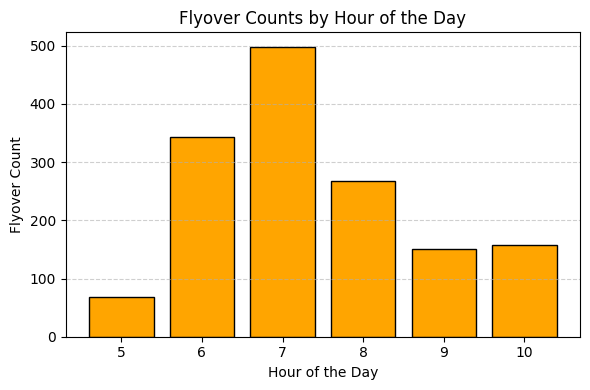

In [123]:
plt.figure(figsize=(6, 4))
plt.bar(flyover_by_hour['Start_Hour'], flyover_by_hour['Flyover_Count'], color='orange', edgecolor='black')
plt.title('Flyover Counts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Flyover Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **OBSERVER TRENDS**

##### **OBSERVER BIAS**

In [124]:
obs_per_observer = df['Observer'].value_counts().reset_index(name='Count')
print("▶ Total observations per Observer:\n", obs_per_observer)

▶ Total observations per Observer:
            Observer  Count
0  Elizabeth Oswald   6391
1    Kimberly Serno   5902
2    Brian Swimelar   4784


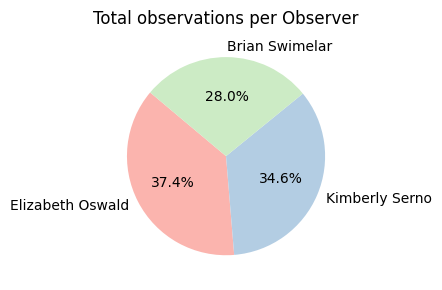

In [125]:
plt.subplots(figsize=(5, 3))
plt.pie(
    obs_per_observer['Count'],
    labels=obs_per_observer['Observer'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Total observations per Observer')
plt.tight_layout()
plt.show()

In [126]:
observer_stats = df.groupby('Observer')['Scientific_Name'].agg(unique_species_count='nunique',most_common_species=lambda x: x.value_counts().idxmax()).reset_index()
print("▶ Species diversity and most common species reported by each Observer:\n", observer_stats)

▶ Species diversity and most common species reported by each Observer:
            Observer  unique_species_count       most_common_species
0    Brian Swimelar                    84     Cardinalis cardinalis
1  Elizabeth Oswald                   120     Cardinalis cardinalis
2    Kimberly Serno                    91  Thryothorus ludovicianus


##### **VISIT PATTERN**

In [127]:
visit_species_summary = df.groupby('Visit').agg(
    Total_observations=('Scientific_Name', 'count'),
    Unique_species=('Scientific_Name', 'nunique')
).reset_index()
print("▶ Summary of observations and species count by Visit:\n", visit_species_summary)

▶ Summary of observations and species count by Visit:
    Visit  Total_observations  Unique_species
0      1                7588             119
1      2                6801             100
2      3                2688              74


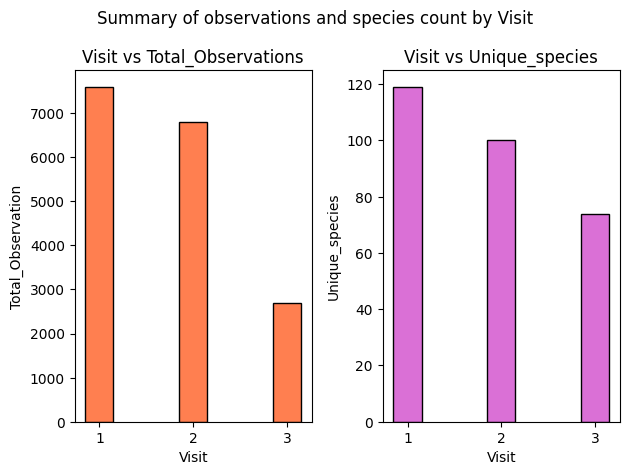

In [128]:
plt.subplot(1,2,1)
plt.bar(visit_species_summary['Visit'], visit_species_summary['Total_observations'], color='coral', edgecolor='black',width=0.3)
plt.title("Visit vs Total_Observations")
plt.xlabel("Visit")
plt.ylabel("Total_Observation")
plt.subplot(1,2,2)
plt.bar(visit_species_summary['Visit'], visit_species_summary['Unique_species'], color='Orchid', edgecolor='black',width=0.3)
plt.title("Visit vs Unique_species")
plt.xlabel("Visit")
plt.ylabel("Unique_species")
plt.suptitle("Summary of observations and species count by Visit")
plt.tight_layout()
plt.show()

## **CONSERVATION INSIGHTS**

##### **WATCHLIST TRENDS**

In [129]:
pif_summary = df.groupby('PIF_Watchlist_Status').agg(
    Total_observations=('Scientific_Name', 'size'),      
    Unique_species=('Scientific_Name', 'nunique')        
).reset_index()
print("▶ Summary of observations and unique species by PIF Watchlist Status:\n", pif_summary)

▶ Summary of observations and unique species by PIF Watchlist Status:
    PIF_Watchlist_Status  Total_observations  Unique_species
0                 False               16699             119
1                  True                 378               8


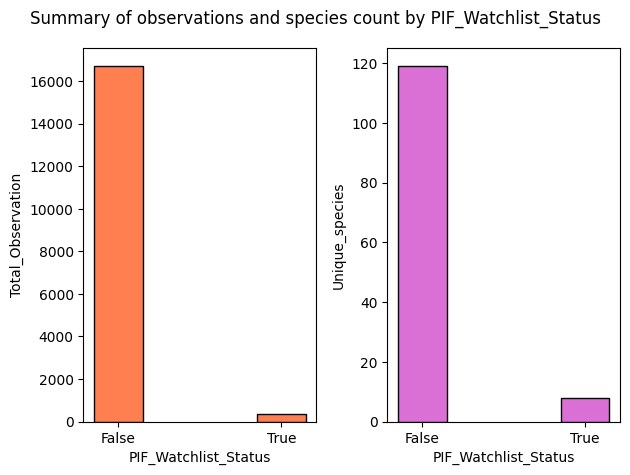

In [130]:
plt.subplot(1,2,1)
plt.bar(pif_summary['PIF_Watchlist_Status'].astype(str), pif_summary['Total_observations'], color='coral', edgecolor='black',width=0.3)
plt.xlabel("PIF_Watchlist_Status")
plt.ylabel("Total_Observation")
plt.subplot(1,2,2)
plt.bar(pif_summary['PIF_Watchlist_Status'].astype(str), pif_summary['Unique_species'], color='Orchid', edgecolor='black',width=0.3)
plt.xlabel("PIF_Watchlist_Status")
plt.ylabel("Unique_species")
plt.suptitle("Summary of observations and species count by PIF_Watchlist_Status")
plt.tight_layout()
plt.show()

In [131]:
regional_summary = df.groupby('Regional_Stewardship_Status').agg(
    Total_observations=('Scientific_Name', 'size'),      
    Unique_species=('Scientific_Name', 'nunique')        
).reset_index()
print("▶ Summary of observations and unique species by Regional Stewardship Status:\n", regional_summary)

▶ Summary of observations and unique species by Regional Stewardship Status:
    Regional_Stewardship_Status  Total_observations  Unique_species
0                        False               13092             106
1                         True                3985              21


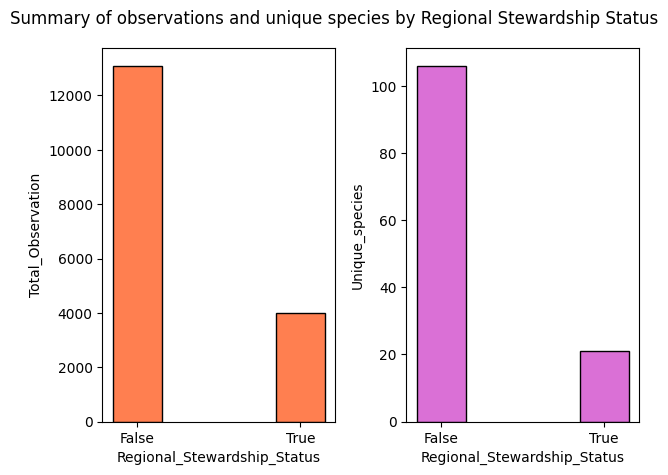

In [132]:
plt.subplot(1,2,1)
plt.bar(regional_summary['Regional_Stewardship_Status'].astype(str), regional_summary['Total_observations'], color='coral', edgecolor='black',width=0.3)
plt.xlabel("Regional_Stewardship_Status")
plt.ylabel("Total_Observation")
plt.subplot(1,2,2)
plt.bar(regional_summary['Regional_Stewardship_Status'].astype(str), regional_summary['Unique_species'], color='Orchid', edgecolor='black',width=0.3)
plt.xlabel("Regional_Stewardship_Status")
plt.ylabel("Unique_species")
plt.suptitle("Summary of observations and unique species by Regional Stewardship Status")
plt.tight_layout()
plt.show()

In [133]:
watchlist_species = df[df['PIF_Watchlist_Status'].notna()]['Scientific_Name'].unique()
stewardship_species = df[df['Regional_Stewardship_Status'].notna()]['Scientific_Name'].unique()
print(f"\n▶ Number of species on PIF Watchlist: {len(watchlist_species)}")
print(f"▶ Number of species under Regional Stewardship: {len(stewardship_species)}")


▶ Number of species on PIF Watchlist: 127
▶ Number of species under Regional Stewardship: 127


##### **AOU CODE PATTERNS**

In [134]:
print("▶ Total unique AOU Codes:", df['AOU_Code'].nunique())
aou_counts = df['AOU_Code'].value_counts().reset_index(name='Observation_Count')
print("▶ Top observed AOU Codes:\n", aou_counts.head())

▶ Total unique AOU Codes: 126
▶ Top observed AOU Codes:
   AOU_Code  Observation_Count
0     NOCA               1160
1     CARW               1011
2     REVI                739
3     ETTI                728
4     INBU                635


In [135]:
species_per_aou = df.groupby('AOU_Code')['Scientific_Name'].nunique().reset_index(name='Species_Count')
print("▶ Number of species per AOU Code:\n", species_per_aou.head())

▶ Number of species per AOU Code:
   AOU_Code  Species_Count
0     ACFL              1
1     AMCR              1
2     AMGO              2
3     AMKE              1
4     AMRE              1


In [136]:
print("▶ Description of AOU Code-based observation distribution:\n", aou_counts['Observation_Count'].describe())

▶ Description of AOU Code-based observation distribution:
 count     126.000000
mean      135.531746
std       214.813805
min         1.000000
25%         4.250000
50%        29.000000
75%       209.000000
max      1160.000000
Name: Observation_Count, dtype: float64
